In [1]:
#Fahad Malik, Roll# 18L-2097, MS(DS)
#Report


# Three convolution layers are used and max pooling respectively along side the fully connected layer and a softmax layer.
# Defined a CNN architecture with 3 convolutional, convolution respective max pooling layers and fully connected 
# layers(also softmax layer). 
# The network topology can be summarized as follows.

# The model is fit over 12 epochs with a batch size of 128.

# 1st Convolutional layer with 30 feature maps of size 5×5.and a rectifier activation function. This is the input layer,
# expecting images with the structure outline [pixels][width][height].
# Pooling layer taking the max over 2*2 patches with stride of 2*2.

# 2nd Convolutional layer with 15 feature maps of size 3x3.
# Pooling layer taking the max over 2*2 patches with stride of 2*2.

# 3rd Convolutional layer with 10 feature maps of size 2x2.
# Pooling layer taking the max over 2*2 patches with stride of 2*2.

# This layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 25% of neurons 
# in the layer in order to reduce overfitting.

# Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by 
# standard fully connected layers.

# Next a fully connected layer with 128 neurons and rectifier activation function.

# Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output 
# probability-like predictions for each class.

# The model takes about 100 seconds to run per epoch. This model achieves the respectable 
# classification Test accuracy: 0.984 (98.4%)  at an Error rate : 1.56%


In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import TensorBoard               #Part B
import matplotlib.pyplot as plt

Using TensorFlow backend.


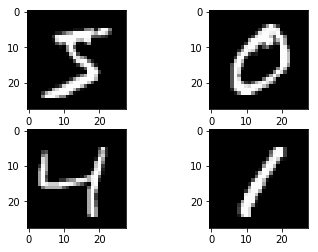

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [6]:
model = Sequential()
model.add(Conv2D(30, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Conv2D(10, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
tensor_board = TensorBoard(log_dir='./Graph', histogram_freq=1, write_graph=True, write_images=True)        #Part B

History =model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensor_board]                  #Part B
          #callbacks=[keras.callbacks.TensorBoard(log_dir = "logs",histogram_freq = 2,write_grads=True,write_graph = True, write_images = True, embeddings_freq = 0,  embeddings_layer_names = None, embeddings_metadata = None)]
                                )
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("CNN Error: %.2f%%" % (100-score[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 51s 857us/step - loss: 0.5478 - acc: 0.8237 - val_loss: 0.1137 - val_acc: 0.9646
Epoch 2/12
60000/60000 [==============================] - 50s 826us/step - loss: 0.2008 - acc: 0.9383 - val_loss: 0.0872 - val_acc: 0.9712
Epoch 3/12
60000/60000 [==============================] - 48s 802us/step - loss: 0.1630 - acc: 0.9499 - val_loss: 0.0741 - val_acc: 0.9759
Epoch 4/12
60000/60000 [==============================] - 50s 835us/step - loss: 0.1446 - acc: 0.9551 - val_loss: 0.0669 - val_acc: 0.9782
Epoch 5/12
60000/60000 [==============================] - 49s 824us/step - loss: 0.1304 - acc: 0.9594 - val_loss: 0.0648 - val_acc: 0.9788
Epoch 6/12
60000/60000 [==============================] - 48s 799us/step - loss: 0.1190 - acc: 0.9630 - val_loss: 0.0577 - val_acc: 0.9807
Epoch 7/12
60000/60000 [==============================] - 49s 810us/step - loss: 0.1128 - acc: 0.9643 - val_loss: 0.

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 10)          610       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 10)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 10)          0         
__________

In [8]:
# Part B 
# Just tensorboard is imported in index 1 and call back function of the keras is used in index 6. "Part B" is mentioned next 
# to these lines in the mentioned indexes.
# Rest of the code for part B is given below.
# The blow code os for error plot Vs epochs. I have displayed accuracy as well as loss graph of both training and validation 
# data.

# The visualization of the architecture of this model is done on tensorboard (Screenshots are attatched within email)
# The weights plotation via histograms is done on tensorboard (The weights are described in kernel histogram) 
# (Screenshots of weights of Cov layers and Fully connected layers i.e the dense layers are attatched within the email)

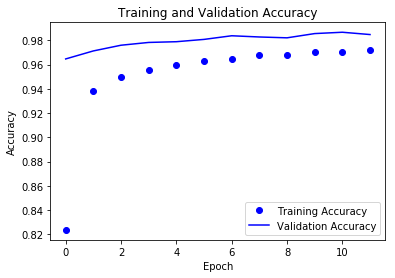

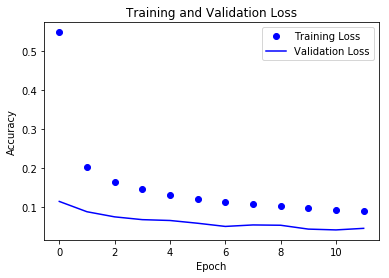

In [9]:
accuracy = History.history['acc']
val_accuracy = History.history['val_acc']
loss = History.history['loss']
val_loss = History.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()